## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


In [4]:
import os
import keras
import numpy as np

# Try to enable GPU (optional)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
np.max(train, axis=1)

ValueError: could not broadcast input array from shape (50000,32,32,3) into shape (50000)

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [16]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 355us/step - loss: 1.6861 - acc: 0.4007 - val_loss: 1.5368 - val_acc: 0.4587
Epoch 2/100
50000/50000 [==============================] - 17s 336us/step - loss: 1.4656 - acc: 0.4819 - val_loss: 1.4535 - val_acc: 0.4917
Epoch 3/100
50000/50000 [==============================] - 17s 339us/step - loss: 1.3495 - acc: 0.5218 - val_loss: 1.3991 - val_acc: 0.5076
Epoch 4/100
50000/50000 [==============================] - 17s 347us/step - loss: 1.2501 - acc: 0.5601 - val_loss: 1.3819 - val_acc: 0.5195
Epoch 5/100
50000/50000 [==============================] - 17s 349us/step - loss: 1.1709 - acc: 0.5855 - val_loss: 1.3828 - val_acc: 0.5248
Epoch 6/100
50000/50000 [==============================] - 19s 373us/step - loss: 1.0917 - acc: 0.6139 - val_loss: 1.3675 - val_acc: 0.5321
Epoch 7/100
50000/50000 [==============================] - 19s

Epoch 57/100
50000/50000 [==============================] - 21s 424us/step - loss: 0.1067 - acc: 0.9648 - val_loss: 3.5507 - val_acc: 0.5301
Epoch 58/100
50000/50000 [==============================] - 21s 423us/step - loss: 0.1070 - acc: 0.9647 - val_loss: 3.5249 - val_acc: 0.5369
Epoch 59/100
50000/50000 [==============================] - 21s 423us/step - loss: 0.0953 - acc: 0.9683 - val_loss: 3.5942 - val_acc: 0.5268
Epoch 60/100
50000/50000 [==============================] - 21s 426us/step - loss: 0.1006 - acc: 0.9669 - val_loss: 3.7210 - val_acc: 0.5347
Epoch 61/100
50000/50000 [==============================] - 21s 425us/step - loss: 0.1099 - acc: 0.9641 - val_loss: 3.5658 - val_acc: 0.5340
Epoch 62/100
50000/50000 [==============================] - 21s 428us/step - loss: 0.1145 - acc: 0.9620 - val_loss: 3.5893 - val_acc: 0.5330
Epoch 63/100
50000/50000 [==============================] - 21s 429us/step - loss: 0.0899 - acc: 0.9704 - val_loss: 3.6057 - val_acc: 0.5367
Epoch 64/100


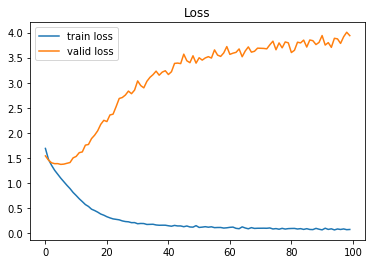

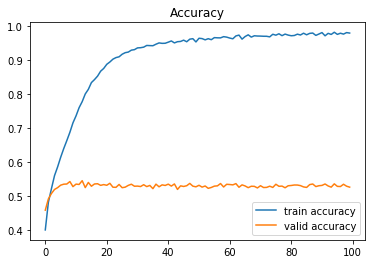

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()